## 과제 : AutoMPG data 분석 모델 만들기

- data     : autoMPG.csv
- feature  : acceration, model year
- target   : mpg 
- 학습유형 : 회귀
- 알고리즘 : 


1. 모듈 로딩 / 데이터 준비

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [145]:
mpg = pd.read_csv('../data/auto-mpg.csv')

In [146]:
mpg.horsepower = mpg['horsepower'].replace('?',0)
mpg.horsepower = mpg.horsepower.astype(int)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


2. 데이터 확인: 
- target - feature 관계 : 상관계수, 시각화

In [147]:
corr = mpg.corr(numeric_only=True)
corr1 = mpg.corr(numeric_only=True)['mpg'].to_list()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636
weight,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000


In [148]:
feature = mpg[mpg.columns[1:5]]
target = mpg['mpg']

feature.head()

,cylinders,displacement,horsepower,weight
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449


In [149]:
# 피처 - 타겟 관계 시각화 / 정수화
# 매개변수 ; 행 번호, 열 번호, 타겟, 피처리스트, 상관계수 값
# 리턴     ; 없음

def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]],label = f'corr: {corr[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend
    plt.tight_layout()
    plt.show()

# 
# plt.scatter(x = target, y = feature['acceleration'], label = 'acceleration')
# plt.xlabel('mpg')
# plt.ylabel(feature['acceleration'])
# 
# plt.scatter(x = target, y = feature['model year'], label = 'model year')
# plt.xlabel('mpg')
# plt.ylabel(feature['model year'])
# plt.legend()
# 
# plt.show()

In [150]:
corr = mpg.corr(numeric_only=True)['mpg'].to_list()
corr

[1.0,
 -0.7753962854205539,
 -0.8042028248058979,
 -0.7542761981708765,
 -0.8317409332443344,
 0.42028891210165054,
 0.5792671330833092,
 0.5634503597738431]

In [151]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [152]:
mpg.shape

(398, 9)

In [153]:
target.shape

(398,)

In [154]:
feature.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [155]:
feature.shape

(398, 4)

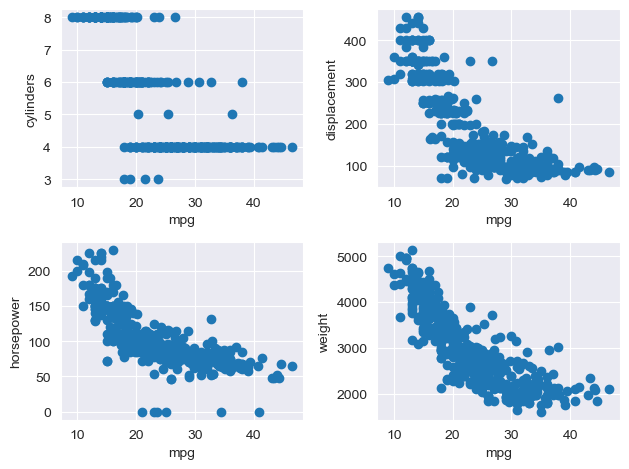

In [156]:
print_feature(2,2, mpg,'mpg', feature.columns, corr1[1:])

cylinder => 버립시당

In [157]:
feature = feature[feature.columns[1:5]]
feature

,displacement,horsepower,weight
0,307.0,130,3504
1,350.0,165,3693
2,318.0,150,3436
3,304.0,150,3433
4,302.0,140,3449
...,...,...,...
393,140.0,86,2790
394,97.0,52,2130
395,135.0,84,2295
396,120.0,79,2625


In [158]:
feature.shape

(398, 3)

In [159]:
target.shape

(398,)

## 학습 진행
- 알고리즘 : 음의 곡선형 관계 => polynomial Regression: 다항회귀
- 학습 데이터 준비 : feature / target 분리, 학습용 / 테스트용 데이터셋 분리
- feature 범위 비교 : horsepower 최저값 - 46 (0 제외)
                      horsepower 최대값 - 230
                      weight 최저값 - 1643
                      weight 최대값 - 4278
==================> 피처 스케일링. 

In [161]:
x_train, x_test, y_train, y_test = train_test_split(feature, target)

In [163]:
print(f'[train] \nx_train ; {x_train.shape}, y_train ; {y_train.shape} ')
print(f'[test] \n x_test ; {x_test.shape}, y_test ; {y_test.shape} ')

[train] 
x_train ; (298, 3), y_train ; (298,) 
[test] 
 x_test ; (100, 3), y_test ; (100,) 


3 - 1. feature scaling : train data fit

In [164]:
standard = StandardScaler()
standard.fit(x_train)

StandardScaler()

In [165]:
mmscaler = MinMaxScaler()  
mmscaler.fit(x_train)


MinMaxScaler()

In [166]:
robust = RobustScaler()
robust.fit(x_train)

RobustScaler()

In [167]:
#3 version of scaled dataset
standard_xtrain = standard.transform(x_train)
standard_xtest = standard.transform(x_test)

mmscaled_xtrain = mmscaler.transform(x_train)
mmscaled_xtest = mmscaler.transform(x_test)

robust_xtrain = robust.transform(x_train)
robust_xtest = robust.transform(x_test)

4. 학습 진행

In [173]:
from sklearn.neighbors import KNeighborsRegressor


In [180]:
def scores(feature, target):
    xtrain, xtest, ytrain, ytest = train_test_split(feature, target)
    standard_xtrain = standard.transform(xtrain)
    standard_xtest = standard.transform(xtest)

    mmscaled_xtrain = mmscaler.transform(xtrain)
    mmscaled_xtest = mmscaler.transform(xtest)

    robust_xtrain = robust.transform(xtrain)
    robust_xtest = robust.transform(xtest)
    
    # 학습시키기
    md1 = KNeighborsRegressor(n_neighbors=25)
    md1.fit(standard_xtrain, ytrain)
    
    md2 = KNeighborsRegressor(n_neighbors=25)
    md2.fit(mmscaled_xtrain, ytrain)
    
    md3 = KNeighborsRegressor(n_neighbors=25)
    md3.fit(robust_xtrain, ytrain)
    
    # 테스트 진행
    standard_train_score = md1.score(standard_xtrain, ytrain)
    standard_test_score = md1.score(standard_xtest, ytest)
    
    mm_train_score = md2.score(mmscaled_xtrain, ytrain)
    mm_test_score = md2.score(mmscaled_xtest, ytest)
    
    robust_train_score = md3.score(robust_xtrain, ytrain)
    robust_test_score = md3.score(robust_xtest, ytest)
    
    # 각 툴을 사용하여 점수만 출력하기
    print(f'standard : \n trainscore: {standard_train_score}\n testscore: {standard_test_score}\n')
    print(f'minmax : \n trainscore: {mm_train_score}\n testscore: {mm_test_score}\n')
    print(f'robust : \n trainscore: {robust_train_score}\n testscore: {robust_test_score}\n')
    
    #과대적합 비교하여 적절한 모델 도출하기
    accuracy_standard = abs(standard_train_score - standard_test_score)
    accuracy_robust = abs(robust_train_score - robust_test_score)
    accuracy_minmax = abs(mm_train_score - robust_test_score)
    total = {'minmax':accuracy_minmax, 'robust':accuracy_robust, 'standard':accuracy_standard} 
    
    total.keys() #key 나열
    total. values() # value 나열
    
    print(f'{min(total)}: 차이 {min(total.values())}')

In [181]:
scores(feature, target)

standard : 
 trainscore: 0.7575514204460303
 testscore: 0.757580901482035

minmax : 
 trainscore: 0.7572413055685017
 testscore: 0.7679646708539367

robust : 
 trainscore: 0.7566947053470029
 testscore: 0.7506258697595156

minmax: 차이 2.9481036004752603e-05
